## Glaucoma Type Prediction

Develop a multiclass classification model capable of accurately identifying different glaucoma types (e.g., primary open-angle glaucoma, angle-closure glaucoma, normal-tension glaucoma)

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.utils import shuffle

## Data Exploration

In [3]:
df = pd.read_csv('glaucoma_dataset.csv')

In [4]:
df.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Patient ID                                  10000 non-null  int64  
 1   Age                                         10000 non-null  int64  
 2   Gender                                      10000 non-null  object 
 3   Visual Acuity Measurements                  10000 non-null  object 
 4   Intraocular Pressure (IOP)                  10000 non-null  float64
 5   Cup-to-Disc Ratio (CDR)                     10000 non-null  float64
 6   Family History                              10000 non-null  object 
 7   Medical History                             7453 non-null   object 
 8   Medication Usage                            8769 non-null   object 
 9   Visual Field Test Results                   10000 non-null  object 
 10  Optical Coh

In [7]:
#Checking the sum of diagnosed Glaucoma 
num_of_diagnosed= (df['Diagnosis'] == 'Glaucoma').sum()
num_of_diagnosed

5012

In [8]:
cols = ['Age', 'Intraocular Pressure (IOP)', 'Cup-to-Disc Ratio (CDR)']
df[cols].describe()

,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR)
count,10000.000000,10000.000000,10000.000000
mean,53.872200,17.507527,0.548437
std,21.127563,4.356101,0.144326
min,18.000000,10.000000,0.300000
25%,36.000000,13.760000,0.420000
50%,54.000000,17.485000,0.550000
75%,72.000000,21.300000,0.670000
max,90.000000,25.000000,0.800000


- Youngest patient is 18 years old and the oldest is 90 years old.
- Mean age of the patients is 54 years old.

array([<Axes: title={'center': 'Glaucoma'}>,
       <Axes: title={'center': 'No Glaucoma'}>], dtype=object)

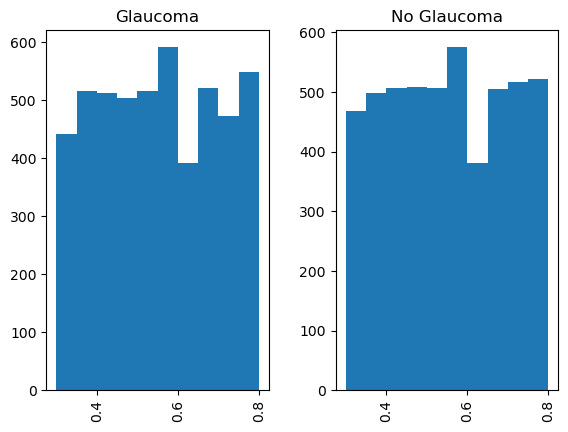

In [10]:
df.hist(column='Cup-to-Disc Ratio (CDR)', by='Diagnosis')

- The above graph shows that a large cup-to-disc ratio doesn’t necessarily mean that individuals are diagnosed with glaucoma

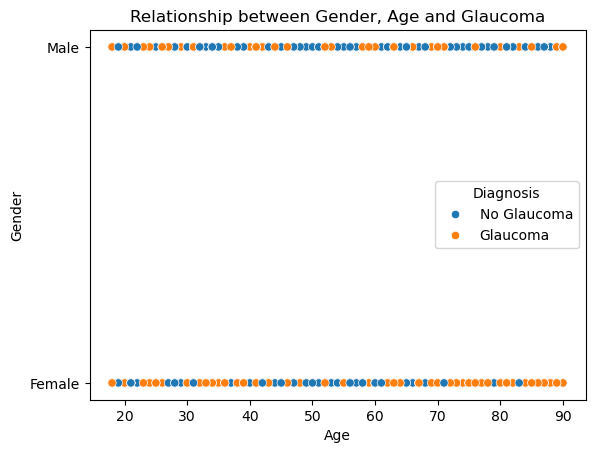

In [12]:
sns.scatterplot(x = 'Age', y = 'Gender', hue = 'Diagnosis', data = df)
plt.title('Relationship between Gender, Age and Glaucoma');

- The distribution of the graph above shows that females tend to have a higher risk of diagnosed glaucoma as their age increases.

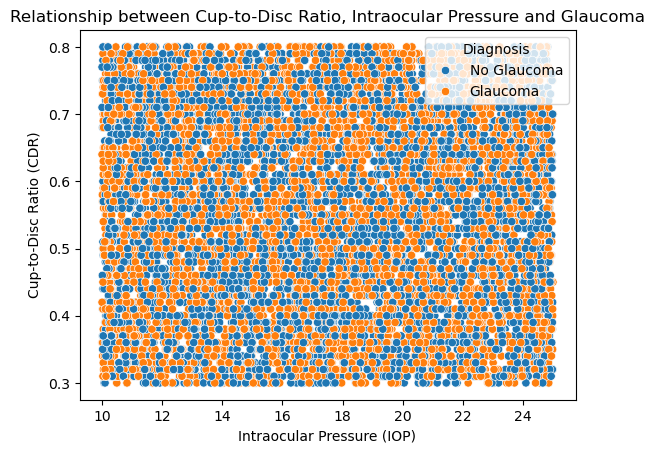

In [14]:
sns.scatterplot(x = 'Intraocular Pressure (IOP)', y = 'Cup-to-Disc Ratio (CDR)', hue = 'Diagnosis', data = df)
plt.title('Relationship between Cup-to-Disc Ratio, Intraocular Pressure and Glaucoma');

In [15]:
GlaucomaType_count = df['Glaucoma Type'].value_counts()
GlaucomaType_count

Glaucoma Type
Juvenile Glaucoma              1734
Normal-Tension Glaucoma        1699
Primary Open-Angle Glaucoma    1668
Secondary Glaucoma             1657
Congenital Glaucoma            1641
Angle-Closure Glaucoma         1601
Name: count, dtype: int64

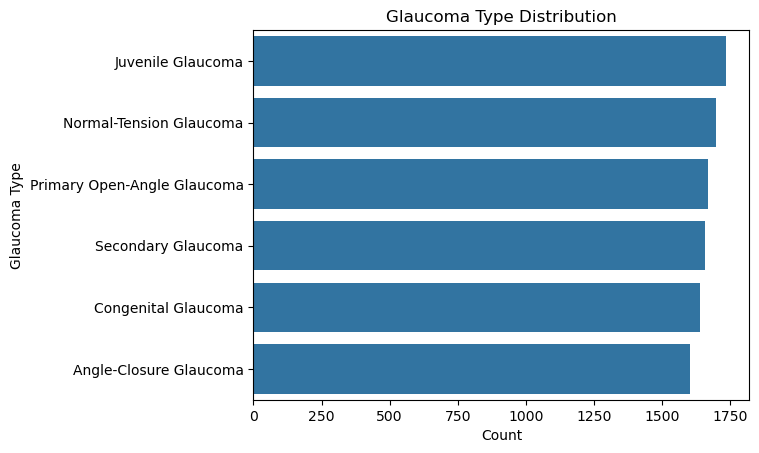

In [16]:
sns.barplot(x=GlaucomaType_count.values, y=GlaucomaType_count.index, orient='h')

plt.title('Glaucoma Type Distribution')
plt.xlabel('Count')
plt.ylabel('Glaucoma Type')
plt.show()

## Data Cleaning & Preprocessing

In [18]:
#Drop irrelevant data
df.drop(columns=['Patient ID'], inplace=True)

In [19]:
#Check what's in VA Measurements 
unique_VA_values = df['Visual Acuity Measurements'].unique()
unique_VA_values

array(['LogMAR 0.1', '20/40', 'LogMAR 0.0', '20/20'], dtype=object)

In [20]:
#Standardise VA Measurements format to only LogMAR 

df['LogMAR VA'] = None

for index, row in df.iterrows():
    va_measurement = row['Visual Acuity Measurements']
    if 'LogMAR' in va_measurement:
        logmar_value = float(va_measurement.split()[1])
    elif va_measurement == '20/40':
        logmar_value = 0.3
    elif va_measurement == '20/20':
        logmar_value = 0.0
    else:
        logmar_value = None
    df.at[index, 'LogMAR VA'] = logmar_value

df[['Visual Acuity Measurements', 'LogMAR VA']]

,Visual Acuity Measurements,LogMAR VA
0,LogMAR 0.1,0.1
1,LogMAR 0.1,0.1
2,20/40,0.3
3,LogMAR 0.0,0.0
4,LogMAR 0.1,0.1
...,...,...
9995,LogMAR 0.1,0.1
9996,LogMAR 0.0,0.0
9997,20/40,0.3
9998,LogMAR 0.1,0.1


In [21]:
#Drop 'Visual Acuity Measurements'
df.drop(columns=['Visual Acuity Measurements'], inplace=True)

In [22]:
#Check unique values in VFT Results
unique_VFT_values = df['Visual Field Test Results'].unique()
unique_VFT_values

array(['Sensitivity: 0.54, Specificity: 0.75',
       'Sensitivity: 0.72, Specificity: 0.88',
       'Sensitivity: 0.56, Specificity: 0.8', ...,
       'Sensitivity: 0.96, Specificity: 0.92',
       'Sensitivity: 0.69, Specificity: 1.0',
       'Sensitivity: 0.5, Specificity: 0.95'], dtype=object)

In [23]:
#Add all the VFT results to their own column
df['VFT Sensitivity'] = None
df['VFT Specificity'] = None

for index, row in df.iterrows():
    vft_results = row['Visual Field Test Results']
    values = vft_results.split(', ')
    if len(values) == 2:
        sensitivity = float(values[0].split(': ')[1])
        specificity = float(values[1].split(': ')[1])
        df.at[index, 'VFT Sensitivity'] = sensitivity
        df.at[index, 'VFT Specificity'] = specificity

In [24]:
df[['VFT Sensitivity', 'VFT Specificity']]

,VFT Sensitivity,VFT Specificity
0,0.54,0.75
1,0.72,0.88
2,0.56,0.8
3,0.6,0.93
4,0.82,0.9
...,...,...
9995,0.81,0.97
9996,0.7,0.97
9997,0.8,0.9
9998,0.68,0.9


In [25]:
#Drop Visual Field Test Results
df.drop(columns=['Visual Field Test Results'], inplace=True)

In [26]:
#Check unique values in OCT Results
unique_OCT_values = df['Optical Coherence Tomography (OCT) Results'].unique()
unique_OCT_values

array(['RNFL Thickness: 86.48 µm, GCC Thickness: 64.14 µm, Retinal Volume: 5.63 mm³, Macular Thickness: 283.67 µm',
       'RNFL Thickness: 96.88 µm, GCC Thickness: 56.48 µm, Retinal Volume: 5.69 mm³, Macular Thickness: 261.48 µm',
       'RNFL Thickness: 89.81 µm, GCC Thickness: 59.05 µm, Retinal Volume: 5.96 mm³, Macular Thickness: 282.34 µm',
       ...,
       'RNFL Thickness: 95.93 µm, GCC Thickness: 59.78 µm, Retinal Volume: 5.85 mm³, Macular Thickness: 280.84 µm',
       'RNFL Thickness: 92.84 µm, GCC Thickness: 69.35 µm, Retinal Volume: 5.54 mm³, Macular Thickness: 270.12 µm',
       'RNFL Thickness: 88.77 µm, GCC Thickness: 58.74 µm, Retinal Volume: 5.87 mm³, Macular Thickness: 262.64 µm'],
      dtype=object)

In [27]:
#Add all the OCT results to their own column

df['OCT RNFL Thickness (µm)'] = None
df['OCT GCC Thickness (µm)'] = None
df['OCT Retinal Volume (mm³)'] = None
df['OCT Macular Thickness (µm)'] = None

for index, row in df.iterrows():
    oct_results = row['Optical Coherence Tomography (OCT) Results']
    values = re.findall(r'\d+\.\d+', oct_results)
    
    if len(values) == 4:
        df.at[index, 'OCT RNFL Thickness (µm)'] = float(values[0])
        df.at[index, 'OCT GCC Thickness (µm)'] = float(values[1])
        df.at[index, 'OCT Retinal Volume (mm³)'] = float(values[2])
        df.at[index, 'OCT Macular Thickness (µm)'] = float(values[3]) 

In [28]:
df[['OCT RNFL Thickness (µm)', 'OCT GCC Thickness (µm)', 'OCT Retinal Volume (mm³)', 'OCT Macular Thickness (µm)']]

,OCT RNFL Thickness (µm),OCT GCC Thickness (µm),OCT Retinal Volume (mm³),OCT Macular Thickness (µm)
0,86.48,64.14,5.63,283.67
1,96.88,56.48,5.69,261.48
2,89.81,59.05,5.96,282.34
3,87.25,63.98,6.44,262.86
4,82.61,66.01,6.16,261.78
...,...,...,...,...
9995,83.41,66.55,5.92,275.25
9996,83.04,63.24,6.13,268.39
9997,95.93,59.78,5.85,280.84
9998,92.84,69.35,5.54,270.12


In [29]:
#Drop Optical Coherence Tomography (OCT) Results
df.drop(columns=['Optical Coherence Tomography (OCT) Results'], inplace=True)

In [30]:
#convert VFT results and OCT results's dtype into float instead of object
columns_to_convert = [
    'VFT Sensitivity',
    'VFT Specificity',
    'OCT RNFL Thickness (µm)',
    'OCT GCC Thickness (µm)',
    'OCT Retinal Volume (mm³)',
    'OCT Macular Thickness (µm)'
]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [31]:
#Check unique value
df['Medication Usage'].unique()

array(['Amoxicillin, Lisinopril, Omeprazole, Atorvastatin, Ibuprofen, Aspirin, Metformin',
       'Lisinopril, Amoxicillin, Atorvastatin, Ibuprofen, Omeprazole',
       'Amoxicillin, Ibuprofen, Metformin, Atorvastatin, Aspirin, Lisinopril',
       ...,
       'Ibuprofen, Atorvastatin, Aspirin, Metformin, Omeprazole, Lisinopril, Amoxicillin',
       'Aspirin, Omeprazole, Lisinopril, Atorvastatin, Ibuprofen, Amoxicillin',
       'Ibuprofen, Omeprazole, Atorvastatin, Lisinopril, Metformin, Aspirin, Amoxicillin'],
      dtype=object)

In [32]:
#Fill up all the null values for ease data process
df.fillna(value=pd.NaT, inplace=True)

In [33]:
#Making all the meds combination to their own column
unique_medications = set()

for meds in df['Medication Usage']:
    if pd.notna(meds):                  # Check if the value is not NaN
        meds_list = meds.split(', ')    # Split the meds
        unique_medications.update(meds_list)

for med in unique_medications:          # Add 1/0 to all the meds accordingly
    df[med] = df['Medication Usage'].apply(lambda x: 1 if (pd.notna(x) and med in x) else 0)

# Drop the original "Medication Usage" column
df.drop(columns=['Medication Usage'], inplace=True)

In [34]:
df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,...,OCT GCC Thickness (µm),OCT Retinal Volume (mm³),OCT Macular Thickness (µm),Lisinopril,Aspirin,Omeprazole,Amoxicillin,Ibuprofen,Atorvastatin,Metformin
0,69,Male,19.46,0.42,No,Diabetes,541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",...,64.14,5.63,283.67,1,1,1,1,1,1,1
1,69,Female,18.39,0.72,No,Hypertension,552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",...,56.48,5.69,261.48,1,0,1,1,1,1,0
2,67,Female,23.65,0.72,No,Hypertension,573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",...,59.05,5.96,282.34,1,1,0,1,1,1,1
3,23,Male,18.04,0.61,No,NaT,590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",...,63.98,6.44,262.86,0,1,0,0,1,0,0
4,21,Male,15.87,0.30,No,Diabetes,588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",...,66.01,6.16,261.78,0,1,1,1,1,1,0


In [35]:
#Repeat the same process for 'Visual Symptoms'
unique_symptoms = set()

for symptoms in df['Visual Symptoms']:
    symptoms_list = symptoms.split(', ')
    unique_symptoms.update(symptoms_list)

for symptom in unique_symptoms:
    df[symptom] = df['Visual Symptoms'].apply(lambda x: 1 if symptom in x else 0)

# Drop the original "Visual Symptoms" column
df.drop(columns=['Visual Symptoms'], inplace=True)

In [36]:
df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Pachymetry,Cataract Status,Angle Closure Status,Diagnosis,...,Atorvastatin,Metformin,Redness in the eye,Vomiting,Tunnel vision,Halos around lights,Nausea,Vision loss,Eye pain,Blurred vision
0,69,Male,19.46,0.42,No,Diabetes,541.51,Present,Open,No Glaucoma,...,1,1,0,0,1,0,1,0,1,0
1,69,Female,18.39,0.72,No,Hypertension,552.77,Absent,Open,No Glaucoma,...,1,0,1,0,1,0,0,1,0,0
2,67,Female,23.65,0.72,No,Hypertension,573.65,Absent,Closed,No Glaucoma,...,1,1,1,0,0,1,0,1,0,0
3,23,Male,18.04,0.61,No,NaT,590.67,Absent,Closed,No Glaucoma,...,0,0,0,0,0,1,1,0,0,0
4,21,Male,15.87,0.30,No,Diabetes,588.41,Absent,Closed,No Glaucoma,...,1,0,0,0,1,0,0,0,1,0


In [37]:
#Map Diagnosis to 1/0
df['Diagnosis'] = df['Diagnosis'].map({'No Glaucoma':0,'Glaucoma':1})

In [38]:
df.groupby('Glaucoma Type')["Diagnosis"].count()

Glaucoma Type
Angle-Closure Glaucoma         1601
Congenital Glaucoma            1641
Juvenile Glaucoma              1734
Normal-Tension Glaucoma        1699
Primary Open-Angle Glaucoma    1668
Secondary Glaucoma             1657
Name: Diagnosis, dtype: int64

In [39]:
#Dummify the rest of the columns
df = pd.get_dummies(data=df, columns=['Gender', 'Family History', 'Medical History','Cataract Status', 'Angle Closure Status'], dtype=int)

In [40]:
#Oversampling the data
df_majority = df[df['Diagnosis'] == 0]
df_minority = df[df['Diagnosis'] == 1]

oversampling_factor = 4

df_minority_oversampled = df_minority.sample(n=len(df_majority) * oversampling_factor, replace=True)

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

df_oversampled = shuffle(df_oversampled, random_state=42)

df_oversampled['Diagnosis'].value_counts()

Diagnosis
1    19952
0     4988
Name: count, dtype: int64

In [41]:
df_oversampled.groupby('Glaucoma Type')["Diagnosis"].count()

Glaucoma Type
Angle-Closure Glaucoma         4057
Congenital Glaucoma            3985
Juvenile Glaucoma              4285
Normal-Tension Glaucoma        4182
Primary Open-Angle Glaucoma    4230
Secondary Glaucoma             4201
Name: Diagnosis, dtype: int64

In [42]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24940 entries, 8068 to 8983
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 24940 non-null  int64  
 1   Intraocular Pressure (IOP)          24940 non-null  float64
 2   Cup-to-Disc Ratio (CDR)             24940 non-null  float64
 3   Pachymetry                          24940 non-null  float64
 4   Diagnosis                           24940 non-null  int64  
 5   Glaucoma Type                       24940 non-null  object 
 6   LogMAR VA                           24940 non-null  object 
 7   VFT Sensitivity                     24940 non-null  float64
 8   VFT Specificity                     24940 non-null  float64
 9   OCT RNFL Thickness (µm)             24940 non-null  float64
 10  OCT GCC Thickness (µm)              24940 non-null  float64
 11  OCT Retinal Volume (mm³)            24940 no

## Modelling

In [44]:
# Split the data into features (X) and target (y)
X = df_oversampled.drop(['Glaucoma Type'], axis=1)
y = df_oversampled['Glaucoma Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y)

In [45]:
y.value_counts(normalize = False)

Glaucoma Type
Juvenile Glaucoma              4285
Primary Open-Angle Glaucoma    4230
Secondary Glaucoma             4201
Normal-Tension Glaucoma        4182
Angle-Closure Glaucoma         4057
Congenital Glaucoma            3985
Name: count, dtype: int64

In [46]:
#Defining hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],    
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]   
}

In [47]:
#Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

In [48]:
#Perform Gridsearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [49]:
#Get the best parameters
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [50]:
#Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [51]:
#Prediction
y_pred = best_rf_model.predict(X_test)

In [52]:
#Crss Validation Score
cross_val_score(best_rf_model, X_train, y_train, cv=5).mean()

0.7851843339242619

In [53]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.81
Classification Report:
                              precision    recall  f1-score   support

     Angle-Closure Glaucoma       0.85      0.79      0.82       811
        Congenital Glaucoma       0.81      0.79      0.80       797
          Juvenile Glaucoma       0.78      0.82      0.80       857
    Normal-Tension Glaucoma       0.81      0.80      0.80       837
Primary Open-Angle Glaucoma       0.79      0.82      0.81       846
         Secondary Glaucoma       0.80      0.81      0.80       840

                   accuracy                           0.81      4988
                  macro avg       0.81      0.80      0.81      4988
               weighted avg       0.81      0.81      0.81      4988



## Conclusion: 

The glaucoma prediction model achieved an overall accuracy of 80%, demonstrating its ability to correctly classify glaucoma types. Key findings from the classification report include:

Precision and Recall:
Precision (positive predictive value) ranges from 78% to 82% across different glaucoma types.
Recall (sensitivity) is consistently high, indicating effective identification of true positive cases.

F1-Score:
The harmonic mean of precision and recall (F1-score) hovers around 0.80 for all glaucoma categories.
This balance suggests robust performance in capturing both true positives and minimizing false positives.

In summary, the model provides valuable insights for clinical decision-making, aiding in personalized glaucoma diagnosis and treatment planning. 
